In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

In [4]:
def cost(T, Y):
    dot_T_Y = np.sum(T * np.log(Y), axis = 1)
    return -dot_T_Y.sum()

In [5]:
def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

In [6]:
def derivative_w2(Z, T, Y):
    return -Z.T.dot(T - Y)

In [7]:
def derivative_b2(T, Y):
    return (-(T - Y)).sum(axis=0)

In [8]:
def derivative_w1_sig(X, Z, T, Y, W2):
    dZ = (T - Y).dot(W2.T) * Z * ( 1 - Z)
    ret2 = X.T.dot(dZ)
    return -ret2

In [9]:
def derivative_b1_sig(T, Y, W2, Z):
    return (-(T - Y).dot(W2.T) * Z * (1-Z)).sum(axis=0)

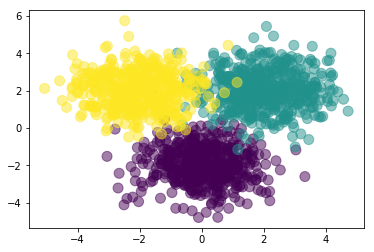

In [10]:
# create the data
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

# randomly initialize weights
w1 = np.random.randn(D, M)
B1 = np.random.randn(M)
w2 = np.random.randn(M, K)
B2 = np.random.randn(K)

cost: 3147.180844402328 classification_rate: 0.26866666666666666
cost: 141.97075097237763 classification_rate: 0.9673333333333334
cost: 123.26725832918534 classification_rate: 0.9686666666666667
cost: 118.83941596682908 classification_rate: 0.9686666666666667
cost: 116.9091029167447 classification_rate: 0.9686666666666667
cost: 115.79062755420198 classification_rate: 0.9693333333333334
cost: 115.03007049303264 classification_rate: 0.9693333333333334
cost: 114.45935430430393 classification_rate: 0.97
cost: 114.00283541809502 classification_rate: 0.97
cost: 113.62188120407879 classification_rate: 0.97


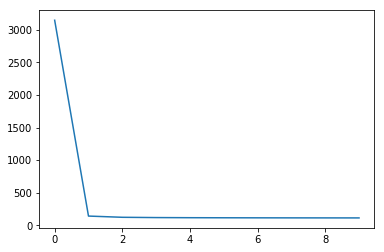

In [11]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
costs_sig = []
for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_sig.append(c)

    # oldW2 = W2.copy()
    W2 -= learning_rate * derivative_w2(hidden, T, output)
    b2 -= learning_rate * derivative_b2(T, output)
    W1 -= learning_rate * derivative_w1_sig(X, hidden, T, output, W2)
    b1 -= learning_rate * derivative_b1_sig(T, output, W2, hidden)
    
plt.plot(costs_sig)
plt.show()

RMS with momentum

cost: 3147.180844402328 classification_rate: 0.26866666666666666
cost: 226.99378079191547 classification_rate: 0.9673333333333334
cost: 163.94344376848818 classification_rate: 0.9686666666666667
cost: 146.29234438920034 classification_rate: 0.9706666666666667
cost: 136.8196074446622 classification_rate: 0.9686666666666667
cost: 130.64037350090103 classification_rate: 0.9693333333333334
cost: 126.16730003966359 classification_rate: 0.97
cost: 122.62312931170612 classification_rate: 0.9693333333333334
cost: 119.63114408861034 classification_rate: 0.968
cost: 117.16666990941395 classification_rate: 0.9673333333333334


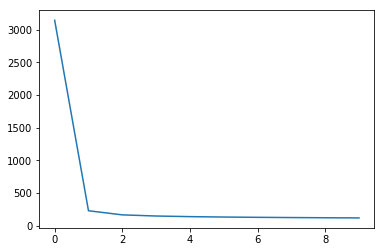

In [12]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
mu = 0.9 
decay_rate = 0.999
eps = 1e-8

cache_w2 = 0
cache_b2 = 0
cache_w1 = 0
cache_b1 = 0

vw2 = 0 
vb2 = 0
vw1 = 0
vb1 = 0

costs_RMS_momentum = []


for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_RMS_momentum.append(c)

    gw2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)
    gw1 = derivative_w1_sig(X, hidden, T, output, W2)
    gb1 = derivative_b1_sig(T, output, W2, hidden)
    
    cache_w2 = decay_rate * cache_w2 + ( 1 - decay_rate ) * gw2 * gw2
    cache_b2 = decay_rate * cache_b2 + ( 1 - decay_rate ) * gb2 * gb2
    cache_w1 = decay_rate * cache_w1 + ( 1 - decay_rate ) * gw1 * gw1
    cache_b1 = decay_rate * cache_b1 + ( 1 - decay_rate ) * gb1 * gb1
    
    vw2 = mu * vw2 - learning_rate * gw2/ np.sqrt( cache_w2 + eps )
    vb2 = mu * vb2 - learning_rate * gb2/ np.sqrt( cache_b2 + eps )
    vw1 = mu * vw1 - learning_rate * gw1/ np.sqrt( cache_w1 + eps )
    vb1 = mu * vb1 - learning_rate * gb1/ np.sqrt( cache_b1 + eps )
    
    
    W2 = W2 + vw2
    b2 = b2 + vb2
    W1 = W1 + vw1
    b1 = b1 + vb1
    
plt.plot(costs_RMS_momentum)
plt.show()

Adam Optimizer

cost: 3147.180844402328 classification_rate: 0.26866666666666666
cost: 2780.3218240573774 classification_rate: 0.31066666666666665
cost: 2471.13977452856 classification_rate: 0.3333333333333333
cost: 2202.1232148074328 classification_rate: 0.35733333333333334
cost: 1963.2415971993182 classification_rate: 0.37733333333333335
cost: 1755.035878460745 classification_rate: 0.4
cost: 1583.0186968791047 classification_rate: 0.43533333333333335
cost: 1446.2336980145956 classification_rate: 0.47933333333333333
cost: 1336.9879247061517 classification_rate: 0.5146666666666667
cost: 1246.472232590314 classification_rate: 0.5533333333333333


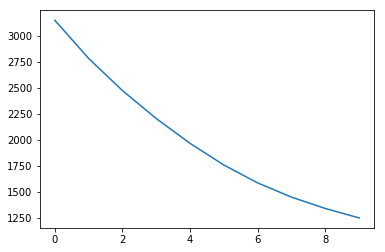

In [13]:
W1 = w1.copy()
b1 = B1.copy()
W2 = w2.copy()
b2 = B2.copy()

learning_rate = 1e-3
beta_1 = 0.9
beta_2 = 0.999
eps = 1e-8
t = 1 

mw2 = 0 
mb2 = 0
mw1 = 0
mb1 = 0

vw2 = 0 
vb2 = 0 
vw1 = 0
vb1 = 0 

costs_ADAM = []

for epoch in range(1000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 100 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:", c, "classification_rate:", r)
        costs_ADAM.append(c)

    gw2 = derivative_w2(hidden, T, output)
    gb2 = derivative_b2(T, output)
    gw1 = derivative_w1_sig(X, hidden, T, output, W2)
    gb1 = derivative_b1_sig(T, output, W2, hidden)
    
    mw2 = beta_1 * mw2 + (1-beta_1) * gw2
    mb2 = beta_1 * mb2 + (1-beta_1) * gb2
    mw1 = beta_1 * mw1 + (1-beta_1) * gw1
    mb1 = beta_1 * mb1 + (1-beta_1) * gb1
    
    vw2 = beta_2 * vw2 + (1-beta_2) * gw2 * gw2
    vb2 = beta_2 * vb2 + (1-beta_2) * gb2 * gb2
    vw1 = beta_2 * vw1 + (1-beta_2) * gw1 * gw1
    vb1 = beta_2 * vb1 + (1-beta_2) * gb1 * gb1
    
    hat_mw2 = mw2/(1-beta_1**t)
    hat_mb2 = mb2/(1-beta_1**t)
    hat_mw1 = mw1/(1-beta_1**t)
    hat_mb1 = mb1/(1-beta_1**t)
    
    hat_vw2 = vw2/(1-beta_2**t)
    hat_vb2 = vb2/(1-beta_2**t)
    hat_vw1 = vw1/(1-beta_2**t)
    hat_vb1 = vb1/(1-beta_2**t)
    
    W2 = W2 - learning_rate * hat_mw2/np.sqrt(hat_vw2 + eps)
    b2 = b2 - learning_rate * hat_mb2/np.sqrt(hat_vb2 + eps)
    W1 = W1 - learning_rate * hat_mw1/np.sqrt(hat_vw1 + eps)
    b1 = b1 - learning_rate * hat_mb1/np.sqrt(hat_vb1 + eps)
    
    t = t + 1
    
        
plt.plot(costs_ADAM)
plt.show()